In [71]:
import pandas as pd
import numpy as np
import sklearn

In [72]:
df=pd.read_csv('Counties_symp_death_policy.csv')

In [73]:
df.head()

,date,state_code_x,fips,gender,age_bucket,n,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,...,is_otherbusinessclose,is_publicmask,is_quarantine,is_restaurantrestrict,is_schoolclose,is_schoolhealthsafety,is_stayathome,is_travelrestrictentry,is_travelrestrictexit,is_travelrestrictintra
0,2020-04-13,al,1003,overall,overall,60,1.6667,1.6667,1.6667,1.6667,...,1,0,0,1,1,0,1,0,0,0
1,2020-04-14,al,1003,overall,overall,68,0.0000,0.0000,0.0000,1.4925,...,1,0,0,1,1,0,1,0,0,0
2,2020-04-15,al,1003,female,overall,51,0.0000,0.0000,1.9608,0.0000,...,1,0,0,1,1,0,1,0,0,0
3,2020-04-15,al,1003,overall,overall,64,0.0000,0.0000,3.1746,0.0000,...,1,0,0,1,1,0,1,0,0,0
4,2020-04-16,al,1003,overall,overall,61,3.2787,3.2787,3.2787,3.2787,...,1,0,0,1,1,0,1,0,0,0


In [74]:
list(df.columns)

['date',
 'state_code_x',
 'fips',
 'gender',
 'age_bucket',
 'n',
 'pct_cli',
 'pct_ili',
 'pct_cli_anosmia_ageusia',
 'pct_hh_cli',
 'pct_cmnty_cli',
 'pct_hh_fever',
 'pct_hh_sore_throat',
 'pct_hh_cough',
 'pct_hh_shortness_of_breath',
 'pct_hh_difficulty_breathing',
 'mean_hh_cli_ct',
 'mean_cmnty_cli_ct',
 'pct_self_fever',
 'pct_self_cough',
 'pct_self_shortness_of_breath',
 'pct_self_difficulty_breathing',
 'pct_self_tiredness_or_exhaustion',
 'pct_self_nasal_congestion',
 'pct_self_runny_nose',
 'pct_self_muscle_joint_aches',
 'pct_self_sore_throat',
 'pct_self_persistent_pain_pressure_in_chest',
 'pct_self_nausea_vomiting',
 'pct_self_diarrhea',
 'pct_self_anosmia_ageusia',
 'pct_self_other',
 'pct_self_none_of_above',
 'pct_self_multiple_symptoms',
 'pct_tested_and_positive',
 'pct_tested_and_negative',
 'pct_tested_no_result',
 'pct_could_not_get_tested',
 'pct_did_not_try_to_get_tested',
 'pct_worked_outside_home',
 'pct_avoid_contact_all_or_most_time',
 'mean_outside_hh_c

In [76]:
df1=df[[
 'date',
 'state_code_x',
 'fips',
 'pct_self_fever_weighted',
 'pct_self_cough_weighted',
 'pct_self_shortness_of_breath_weighted',
 'pct_self_difficulty_breathing_weighted',
 'pct_self_tiredness_or_exhaustion_weighted',
 'pct_self_nasal_congestion_weighted',
 'pct_self_runny_nose_weighted',
 'pct_self_muscle_joint_aches_weighted',
 'pct_self_sore_throat_weighted',
 'pct_self_persistent_pain_pressure_in_chest_weighted',
 'pct_self_nausea_vomiting_weighted',
 'pct_self_diarrhea_weighted',
 'pct_self_anosmia_ageusia_weighted',
 'pct_self_other_weighted',
 'pct_self_none_of_above_weighted',
 'pct_self_multiple_symptoms_weighted',
 'DeathRate1000',
 'pct_tested_and_positive_weighted'
]]

In [77]:
df1.head()

,date,state_code_x,fips,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,...,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,DeathRate1000,pct_tested_and_positive_weighted
0,2020-04-13,al,1003,1.7005,11.8412,6.5403,3.1762,12.2227,18.0445,7.4614,...,7.4551,4.6736,6.1289,8.5840,0.0000,2.9514,67.1351,23.0249,0.004480,1.7005
1,2020-04-14,al,1003,0.0000,20.5351,3.6792,1.7656,13.3274,18.0705,13.5590,...,10.2142,2.9537,1.2120,8.1800,0.0000,3.3335,59.3721,25.7460,0.008959,0.0000
2,2020-04-15,al,1003,0.0000,15.2845,0.0000,2.1812,18.2498,13.6214,16.1999,...,12.0104,4.4081,1.8647,8.4275,2.2269,0.0000,57.4867,28.9517,0.008959,0.0000
3,2020-04-15,al,1003,0.0000,10.0942,0.0000,1.4405,13.9400,8.9959,10.6987,...,7.9319,2.9112,1.2315,5.5657,3.3582,0.0000,66.8962,21.0077,0.008959,0.0000
4,2020-04-16,al,1003,4.1128,12.9268,3.0642,5.6061,16.7421,18.2663,17.4991,...,9.7061,5.4418,7.7675,11.2280,1.5709,6.5834,59.8982,26.5127,0.008959,0.0000


In [78]:
df1.describe()

,fips,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,DeathRate1000,pct_tested_and_positive_weighted
count,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000,100292.000000
mean,27713.157161,0.736667,9.211761,3.699293,2.029949,13.663875,12.742447,10.287470,10.746112,5.048098,1.753695,2.564123,5.619887,1.267171,2.850420,64.432250,21.064036,0.357237,0.558081
std,15861.206802,1.146925,4.297163,2.562961,1.890645,5.095663,4.848742,4.762760,4.179623,3.043681,1.766881,2.160319,3.083806,1.560710,2.108096,7.614945,6.400383,0.509075,1.069513
min,1003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.337200,0.000000,0.000000,0.000000
25%,12086.000000,0.000000,6.158250,1.851100,0.604050,10.114900,9.332475,6.889075,7.838150,2.875500,0.000000,1.007000,3.440275,0.000000,1.331575,59.472175,16.621975,0.055245,0.000000
50%,27053.000000,0.000000,8.760200,3.326650,1.675850,13.272300,12.336600,9.714650,10.395750,4.656400,1.391900,2.166400,5.249850,0.866550,2.531900,64.659100,20.696650,0.155550,0.000000
75%,42003.000000,1.182800,11.740700,5.104025,2.983825,16.762225,15.719400,13.113875,13.267400,6.735200,2.612000,3.677225,7.360525,1.936850,3.992700,69.676850,25.095500,0.415886,0.822600
max,56025.000000,14.050500,43.222700,30.522900,21.380300,47.135300,48.806000,42.154700,36.898500,40.289100,19.381800,22.753200,30.983100,17.968100,19.858200,94.234500,55.748500,3.449426,19.884500


In [80]:
df2=df1.groupby(['date','state_code_x','fips']).mean()
df2=df2.sort_values(by=['state_code_x','fips','date'])
df2=df2.reset_index()
df2.head()

,date,state_code_x,fips,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,...,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,DeathRate1000,pct_tested_and_positive_weighted
0,2020-04-13,ak,2020,1.72370,18.88980,3.04815,3.45465,17.75880,14.96335,21.3959,...,9.31115,2.70895,3.2867,7.46135,2.06205,3.92955,49.55865,29.55695,0.013889,0.0
1,2020-04-14,ak,2020,1.62475,9.78905,2.14130,1.07330,16.37075,12.16335,12.5261,...,5.89405,0.81240,1.8857,5.84050,0.00000,1.57125,57.74005,20.41140,0.013889,0.0
2,2020-04-15,ak,2020,0.00000,11.48340,1.54670,1.54670,8.81140,19.28250,22.1457,...,5.55760,0.00000,2.2254,6.47400,0.00000,0.00000,62.07100,23.11520,0.013889,0.0
3,2020-04-16,ak,2020,0.00000,10.79820,4.64220,2.39160,15.50190,18.60960,22.0372,...,7.85330,2.39160,2.3649,10.66500,0.00000,5.13860,58.07640,28.48590,0.013889,0.0
4,2020-04-20,ak,2020,0.00000,8.24570,5.93070,0.00000,17.42210,17.38060,6.1617,...,2.71540,5.13800,9.2554,2.13080,0.00000,0.00000,56.10610,27.65230,0.013889,0.0


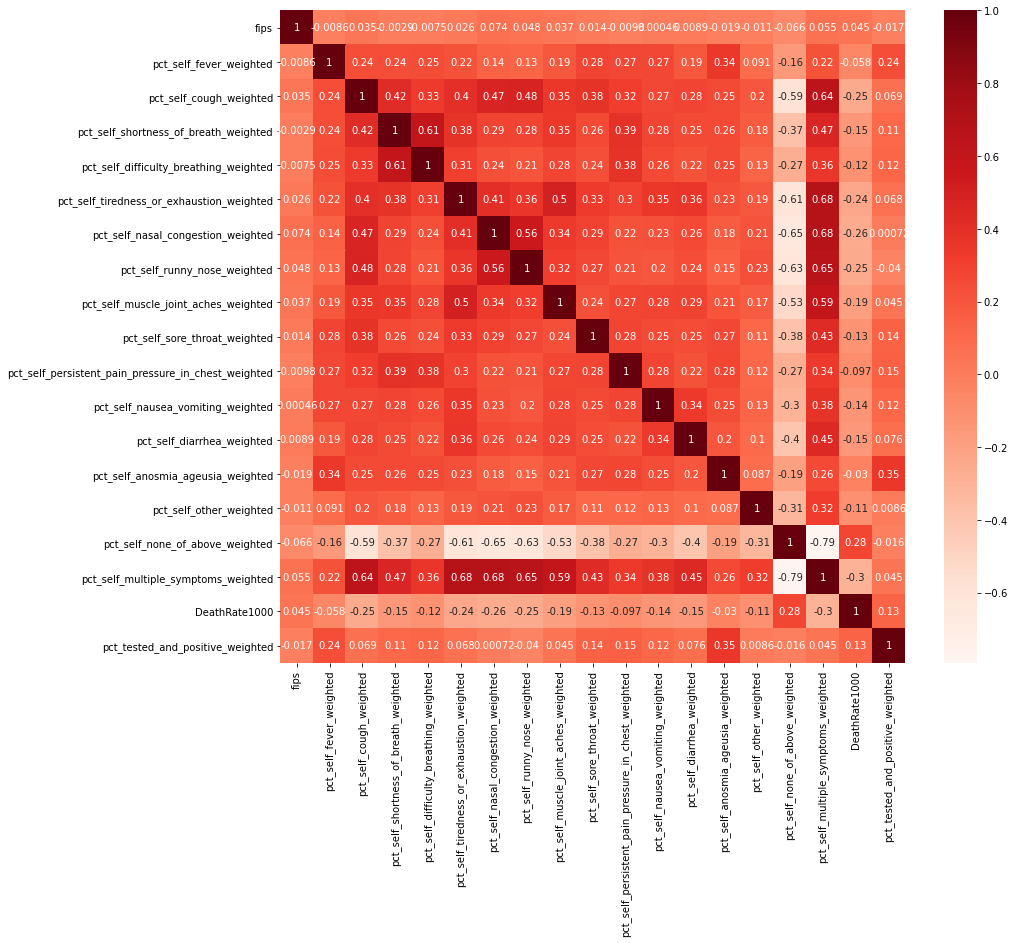

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = df2.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [82]:
max_lag=30
symptoms=[
'pct_self_fever_weighted',
 'pct_self_cough_weighted',
 'pct_self_shortness_of_breath_weighted',
 'pct_self_difficulty_breathing_weighted',
 'pct_self_tiredness_or_exhaustion_weighted',
 'pct_self_nasal_congestion_weighted',
 'pct_self_runny_nose_weighted',
 'pct_self_muscle_joint_aches_weighted',
 'pct_self_sore_throat_weighted',
 'pct_self_persistent_pain_pressure_in_chest_weighted',
 'pct_self_nausea_vomiting_weighted',
 'pct_self_diarrhea_weighted',
 'pct_self_anosmia_ageusia_weighted',
 'pct_self_other_weighted',
 'pct_self_none_of_above_weighted',
 'pct_self_multiple_symptoms_weighted'
]
lagged_correlation = pd.DataFrame.from_dict(
    {x: [df2['pct_tested_and_positive_weighted'].corr(df2[x].shift(-t)) for t in range(max_lag)] for x in symptoms})

In [83]:
lagged_correlation.head(20)

,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted
0,0.236631,0.069099,0.107063,0.118225,0.067913,0.000719,-0.040442,0.045146,0.139122,0.147718,0.115898,0.076436,0.351123,0.008630,-0.015965,0.045018
1,0.089834,-0.001406,0.016005,0.031006,-0.011278,-0.042183,-0.073163,-0.031329,0.075105,0.061085,0.041911,0.013247,0.147255,-0.028272,0.049004,-0.029674
2,0.086615,0.003845,0.010198,0.025177,-0.006790,-0.048049,-0.071400,-0.022656,0.068686,0.050638,0.047612,0.018036,0.144408,-0.024154,0.041555,-0.025103
3,0.085290,0.010078,0.014275,0.022499,-0.010236,-0.040661,-0.066440,-0.023713,0.076167,0.048493,0.033886,0.014474,0.136888,-0.030119,0.045664,-0.025076
4,0.087328,0.008344,0.018247,0.032968,-0.008801,-0.035947,-0.058449,-0.026366,0.064914,0.059046,0.043162,0.016377,0.134412,-0.023698,0.041992,-0.023368
5,0.090048,0.012752,0.009802,0.021741,-0.008536,-0.038575,-0.052395,-0.022547,0.067030,0.050421,0.036762,0.017000,0.133919,-0.018663,0.039426,-0.022327
6,0.097092,0.023305,0.007339,0.018144,-0.006701,-0.025293,-0.038026,-0.021610,0.070042,0.055037,0.032131,0.019665,0.131951,-0.010822,0.028825,-0.012078
7,0.086718,0.030351,0.022833,0.031845,-0.006472,-0.031257,-0.042249,-0.022201,0.072344,0.054465,0.033060,0.020661,0.125932,-0.023228,0.035291,-0.010884
8,0.083040,0.022822,0.010746,0.023582,-0.015303,-0.031234,-0.041486,-0.023057,0.069461,0.053967,0.031914,0.012893,0.125918,-0.016501,0.033662,-0.015923
9,0.078140,0.022517,0.011185,0.025270,-0.020121,-0.030865,-0.042072,-0.031107,0.060816,0.053448,0.033349,0.001898,0.111642,-0.015965,0.039511,-0.024331


In [84]:
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)
s = lagged_correlation.style.background_gradient(cmap=cm)
s

,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted
0,0.236631,0.069099,0.107063,0.118225,0.067913,0.000719,-0.040442,0.045146,0.139122,0.147718,0.115898,0.076436,0.351123,0.008630,-0.015965,0.045018
1,0.089834,-0.001406,0.016005,0.031006,-0.011278,-0.042183,-0.073163,-0.031329,0.075105,0.061085,0.041911,0.013247,0.147255,-0.028272,0.049004,-0.029674
2,0.086615,0.003845,0.010198,0.025177,-0.006790,-0.048049,-0.071400,-0.022656,0.068686,0.050638,0.047612,0.018036,0.144408,-0.024154,0.041555,-0.025103
3,0.085290,0.010078,0.014275,0.022499,-0.010236,-0.040661,-0.066440,-0.023713,0.076167,0.048493,0.033886,0.014474,0.136888,-0.030119,0.045664,-0.025076
4,0.087328,0.008344,0.018247,0.032968,-0.008801,-0.035947,-0.058449,-0.026366,0.064914,0.059046,0.043162,0.016377,0.134412,-0.023698,0.041992,-0.023368
5,0.090048,0.012752,0.009802,0.021741,-0.008536,-0.038575,-0.052395,-0.022547,0.067030,0.050421,0.036762,0.017000,0.133919,-0.018663,0.039426,-0.022327
6,0.097092,0.023305,0.007339,0.018144,-0.006701,-0.025293,-0.038026,-0.021610,0.070042,0.055037,0.032131,0.019665,0.131951,-0.010822,0.028825,-0.012078
7,0.086718,0.030351,0.022833,0.031845,-0.006472,-0.031257,-0.042249,-0.022201,0.072344,0.054465,0.033060,0.020661,0.125932,-0.023228,0.035291,-0.010884
8,0.083040,0.022822,0.010746,0.023582,-0.015303,-0.031234,-0.041486,-0.023057,0.069461,0.053967,0.031914,0.012893,0.125918,-0.016501,0.033662,-0.015923
9,0.078140,0.022517,0.011185,0.025270,-0.020121,-0.030865,-0.042072,-0.031107,0.060816,0.053448,0.033349,0.001898,0.111642,-0.015965,0.039511,-0.024331


In [86]:
df3=df2[[
 'date',
 'state_code_x',
 'fips',
 'pct_self_fever_weighted',
 'pct_self_cough_weighted',
 'pct_self_shortness_of_breath_weighted',
 'pct_self_difficulty_breathing_weighted',
 'pct_self_tiredness_or_exhaustion_weighted',
 'pct_self_muscle_joint_aches_weighted',
 'pct_self_sore_throat_weighted',
 'pct_self_persistent_pain_pressure_in_chest_weighted',
 'pct_self_nausea_vomiting_weighted',
 'pct_self_diarrhea_weighted',
 'pct_self_anosmia_ageusia_weighted',
 'pct_self_multiple_symptoms_weighted',
 'pct_tested_and_positive_weighted'
]]

In [88]:
df3.head()

,date,state_code_x,fips,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_multiple_symptoms_weighted,pct_tested_and_positive_weighted
0,2020-04-13,ak,2020,1.72370,18.88980,3.04815,3.45465,17.75880,9.45565,9.31115,2.70895,3.2867,7.46135,2.06205,29.55695,0.0
1,2020-04-14,ak,2020,1.62475,9.78905,2.14130,1.07330,16.37075,5.71535,5.89405,0.81240,1.8857,5.84050,0.00000,20.41140,0.0
2,2020-04-15,ak,2020,0.00000,11.48340,1.54670,1.54670,8.81140,5.48550,5.55760,0.00000,2.2254,6.47400,0.00000,23.11520,0.0
3,2020-04-16,ak,2020,0.00000,10.79820,4.64220,2.39160,15.50190,16.12100,7.85330,2.39160,2.3649,10.66500,0.00000,28.48590,0.0
4,2020-04-20,ak,2020,0.00000,8.24570,5.93070,0.00000,17.42210,17.56410,2.71540,5.13800,9.2554,2.13080,0.00000,27.65230,0.0


In [117]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [90]:
Y= df3['pct_tested_and_positive_weighted']

In [91]:
X=df3.drop(['pct_tested_and_positive_weighted','date','state_code_x','fips'], axis=1)

In [99]:
feature_train, feature_test, target_train, target_test= train_test_split(X, Y, test_size=.3)

In [118]:
#model=SGDRegressor(max_iter=1000, tol=1e-3)
model=LinearRegression()

In [119]:
model.fit(feature_train,target_train)

LinearRegression()

In [120]:
Y_expected= target_test

In [121]:
Y_predicted= model.predict(feature_test)

In [122]:
print(metrics.mean_absolute_error(Y_expected,Y_predicted ))

0.630466711532934


In [123]:
print(metrics.mean_squared_error(Y_expected,Y_predicted ))

0.8720717603580802


In [124]:
metrics.r2_score(Y_expected,Y_predicted )

0.14887675497271058

In [125]:
metrics.explained_variance_score(Y_expected,Y_predicted )

0.1489708293990245

In [126]:
model.coef_

array([ 0.11571325, -0.00486483,  0.00175622,  0.00913948,  0.0022637 ,
       -0.0030992 ,  0.01673949,  0.02331612,  0.00743611,  0.00569171,
        0.20643344, -0.01788447])

In [127]:
model.intercept_

0.41482009724176805